In [103]:
using Cubature

In [104]:
function Q(n::Int64, r2::Float64, r1::Float64)
    if n % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(big(Int(n/2 - k)))*factorial(big(Int(n/2 - k))))*((r2)^(n-2*k + 1)-(r1)^(n-2*k + 1))/(n-2k+1)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n)/2), step=1)))
    end

        end

Q (generic function with 1 method)

In [138]:
function how_many(r1, r2)
    if r2 < r1
        0
    else
        last_breaker = 0
        lim = .005 # .01^2 is too small, .01 seems good.
        n = 0
        thresh = 30
        while n-last_breaker < thresh
            if Q(n, r1, r2)^2 > lim
                last_breaker = n
            end
            n += 1
        end
        return last_breaker
    end
end

how_many (generic function with 1 method)

In [139]:
using Plots
gr()
step = .1
data = hcat([[how_many(r1, r2) for r1 in range(0, 1, step=step)] for r2 in range(0, 1, step=step)]...)


11×11 Array{Int64,2}:
 0  18  16  12  10  16  14  12  14  12  12
 0   0   6   6   6   4   4   4   4   2   4
 0   0   0   2   4   4   8   2   2   2   2
 0   0   0   0   2   8   8   6   6   4   0
 0   0   0   0   0   0   6   6   6   4   4
 0   0   0   0   0   0   0   4   4   4   4
 0   0   0   0   0   0   0   0   4   4   2
 0   0   0   0   0   0   0   0   0   0   2
 0   0   0   0   0   0   0   0   0   0   2
 0   0   0   0   0   0   0   0   0   0   2
 0   0   0   0   0   0   0   0   0   0   0

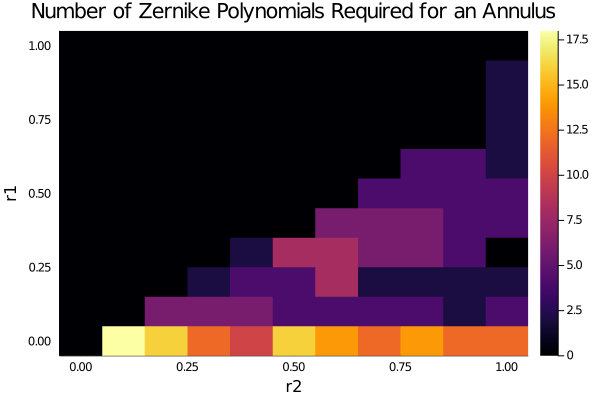

In [140]:
heatmap(range(0, 1, step=step),range(0, 1, step=step), data, xlabel="r2", ylabel="r1", title="Number of Zernike Polynomials Required for an Annulus")

In [86]:
using Plots
plot((coeffs1 + reverse(coeffs2))[1:end])

LoadError: UndefVarError: coeffs2 not defined